# CI280 - Final Project - Part B
#
# Data Preparation, Sort, Groupby and Plot( 100 pts)

## Name


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 8))

In [2]:
df = pd.read_csv('data//owid-covid-data.csv')

In [3]:
# limiting the display rows
pd.set_option('display.max_rows', 5)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61052,ZWE,Africa,Zimbabwe,2020-12-05,10617.0,70.0,113.571,291.0,10.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61053,ZWE,Africa,Zimbabwe,2020-12-06,10718.0,101.0,128.000,291.0,0.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [4]:
df = df[ (df['location'] != 'World') ]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61052,ZWE,Africa,Zimbabwe,2020-12-05,10617.0,70.0,113.571,291.0,10.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61053,ZWE,Africa,Zimbabwe,2020-12-06,10718.0,101.0,128.000,291.0,0.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [5]:
# Show number of records 
import random
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')
print("Number of records:" ,len(df))

Arshad Uddin Mohammed, 20495 7866
------------------------------
Number of records: 60734


## C) Handing Missing Data and Ploting (20 pts)

### use isnull() vs. notnull()
### use dropna
### use replacena

In [6]:
# show last five rows
df.tail(5)     

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
61049,ZWE,Africa,Zimbabwe,2020-12-02,10129.0,0.0,88.714,277.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61050,ZWE,Africa,Zimbabwe,2020-12-03,10424.0,295.0,114.429,280.0,3.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61051,ZWE,Africa,Zimbabwe,2020-12-04,10547.0,123.0,119.000,281.0,1.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61052,ZWE,Africa,Zimbabwe,2020-12-05,10617.0,70.0,113.571,291.0,10.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61053,ZWE,Africa,Zimbabwe,2020-12-06,10718.0,101.0,128.000,291.0,0.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [7]:
# show the number of rows and columns of datafram 
df.shape
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# 1) Show the number records of miss data for continent ( 2 pts)
#    Show the the last five those records 

print('The number records missing data for continent')
print(len(df[df.continent.isnull()]))
df[df.continent.isnull()].tail()






Arshad Uddin Mohammed, 20495 4182
------------------------------
The number records missing data for continent
319


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24949,NaN,NaN,International,2020-12-02,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24950,NaN,NaN,International,2020-12-03,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24951,NaN,NaN,International,2020-12-04,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24952,NaN,NaN,International,2020-12-05,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24953,NaN,NaN,International,2020-12-06,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')


# 2-3) Show the number records of miss data for continent and iso_code (2 pts)
#    Show the the last five those records ( 2 pts)


print('The number records missing data for continent and iso_code')
print(len(df[df.continent.isnull() & df.iso_code.isnull()]))
df[df.continent.isnull() & df.iso_code.isnull()].tail()








Arshad Uddin Mohammed, 20495 6630
------------------------------
The number records missing data for continent and iso_code
319


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24949,NaN,NaN,International,2020-12-02,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24950,NaN,NaN,International,2020-12-03,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24951,NaN,NaN,International,2020-12-04,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24952,NaN,NaN,International,2020-12-05,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24953,NaN,NaN,International,2020-12-06,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')



# 4-5) For the records for Bazil, which columns has missing data (4 pts)
res = df[df['location']=='Saudi arabia']
res

col_names = res.columns
col_names

print('The following columns are missing data for Saudi arabia')

print('Column name \t\t\t\tMissing Data')
print('------------------------------------------------')
for name in col_names:
    num = len(res[res[name].isnull()])
    if num > 0:
        print('{0: <40}'.format(name), num)






Arshad Uddin Mohammed, 20495 2925
------------------------------
The following columns are missing data for Saudi arabia
Column name 				Missing Data
------------------------------------------------


In [10]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')


#df.columns

df.shape
# .dropna() vs. . dropna(how='all')

# 6) Show the result after droping rows which have at least one NaN data in the dataset ()  (2 pts)
cleaned = df.dropna()

print('After using .dropn(), total records: ')
print(len(cleaned))











Arshad Uddin Mohammed, 20495 7229
------------------------------
After using .dropn(), total records: 
0


In [11]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# 7) Show the result after after droping rows which all data is NaN in the dataset ()  (2 pts)


res = df[df['location']=='Saudi arabia']
res
cleaned = res.dropna(how='all')

print("After using .dropna(how='all'), total records:")
print(len(cleaned))







Arshad Uddin Mohammed, 20495 1021
------------------------------
After using .dropna(how='all'), total records:
0


In [12]:

number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

print(df.shape)
print('Original row number:', len(df))

# 8) Show the result after dropping the rows which continent or iso data is missing in the dataset
#    How many rows are dropped. (2 pts)

cleaned_data = df[df.continent.notnull() & df.iso_code.notnull()]
bad_data = df[df.continent.isnull() | df.iso_code.isnull()]
print('After droping all missing data of continent or iso in the dataset')
print('New dataset included record number:', len(cleaned_data))
print('The number of rows droped:', len(bad_data))





Arshad Uddin Mohammed, 20495 6318
------------------------------
(60734, 50)
Original row number: 60734
After droping all missing data of continent or iso in the dataset
New dataset included record number: 60415
The number of rows droped: 319


In [13]:
res = df[df['location']=='Saudi arabia']
res[['location','handwashing_facilities']]

,location,handwashing_facilities


In [14]:

# 9) Show Brazil's handwashing_facilities information
#    Show the average of handwashing_facilities of worldwide level

import random
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

#print(df['handwashing_facilities'].describe())


print("Handwashing_facilities values are missing in Saudi arabia")
res = df[df['location']=='Saudi arabia']
print(len(res))
data = res[res['handwashing_facilities'].isnull()] [['location','date','handwashing_facilities']]
print(data)

avg = df['handwashing_facilities'].mean()
print('The average of handwashing facilities worldwide:', format(avg, '.0f'))









Arshad Uddin Mohammed, 20495 3743
------------------------------
Handwashing_facilities values are missing in Saudi arabia
0
Empty DataFrame
Columns: [location, date, handwashing_facilities]
Index: []
The average of handwashing facilities worldwide: 50


In [15]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

import math

# 10) Replace handwashing_facilities in Saudi arabia as the average of worldwide level (2 pts)


res = df[df['location']=='Saudi arabia']
avg = df['handwashing_facilities'].mean()
avg = math.floor(avg)

print('Now handwashing facilities values are replaced by the average of worldwide level')
data

res['handwashing_facilities'].fillna(avg, inplace=True)
res[['location', 'date','handwashing_facilities']]






Arshad Uddin Mohammed, 20495 1706
------------------------------
Now handwashing facilities values are replaced by the average of worldwide level


,location,date,handwashing_facilities


# D) Sorting, Grouping and Plotting (30 points) 

## df.sort_values(by=['a','b'], ascending = True)
## df.sort_index()
## df.groupby( )

In [16]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')
import matplotlib.pyplot as plt

# 1)  (3 pts) Find the top 10 countries which have the most covid cases

# Group all cases by location , become series
cases = df.groupby(df.location).new_cases.sum()
cases = cases.sort_values(ascending = False)
cases

res = cases.head(10)
countries = res.index

print('Ten countries which have the most covid cases:')
print('Country              Covid cases')
print('---------------------------------------------')
for country in countries:
    print('{0: <20}'.format(country), '\t', format(res[country],'.0f'))












Arshad Uddin Mohammed, 20495 6433
------------------------------
Ten countries which have the most covid cases:
Country              Covid cases
---------------------------------------------
United States        	 14756999
India                	 9677203
Brazil               	 6603540
Russia               	 2439163
France               	 2345648
Italy                	 1728878
United Kingdom       	 1727751
Spain                	 1684647
Argentina            	 1463110
Colombia             	 1371103


Arshad Uddin Mohammed, 20495 896
------------------------------
Index(['United States', 'India', 'Brazil', 'Russia', 'France', 'Italy',
       'United Kingdom', 'Spain', 'Argentina', 'Colombia'],
      dtype='object', name='location')
[14756999.  9677203.  6603540.  2439163.  2345648.  1728878.  1727751.
  1684647.  1463110.  1371103.]


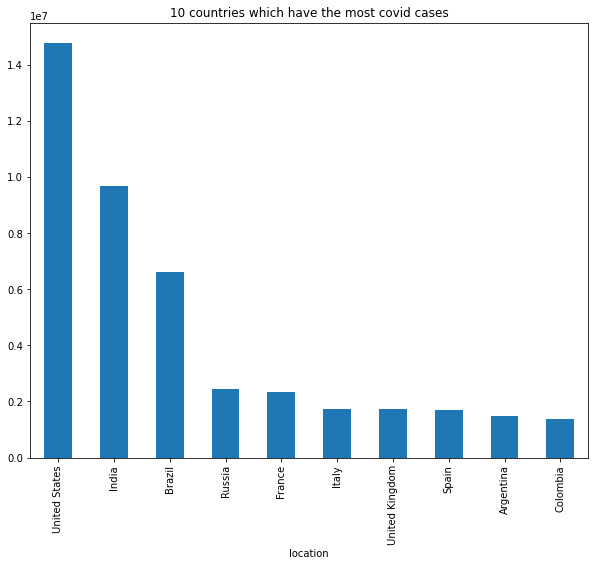

In [17]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')


# 2) Use bar chart to show the top 10 countries which have the most covid cases. (3 pts)


res = cases.head(10)
res

print(res.index)
print(res.values)

res.plot(kind='bar', title='10 countries which have the most covid cases')





Arshad Uddin Mohammed, 20495 160
------------------------------
10 days which have the most Covid Cases
Date                     Covid Cases
---------------------------------------------------
2020-11-06 	 642314
2020-11-11 	 645408
2020-11-12 	 647336
2020-11-13 	 649123
2020-11-19 	 650767
2020-11-20 	 665858
2020-11-27 	 672317
2020-12-02 	 646532
2020-12-03 	 690523
2020-12-04 	 678401


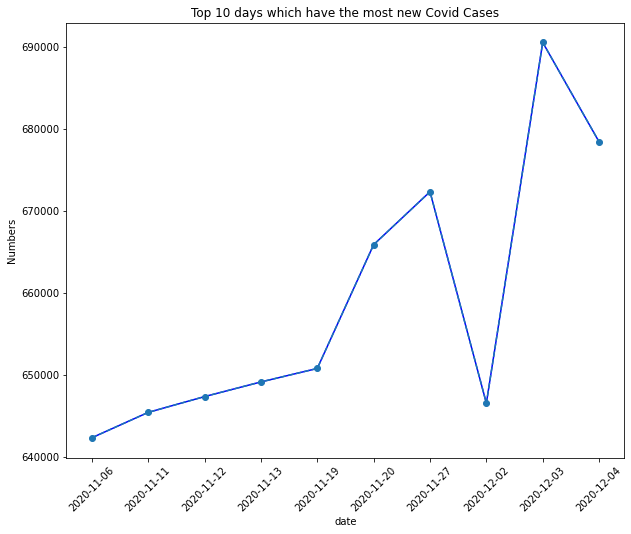

In [18]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# (3  pts)

# 3) Show worldwide, which ten day has the most new cases? 

#    Use line chart to show the top 10 days which have the most new covid cases 

cases = df.groupby(df.date).new_cases.sum()
cases = cases.sort_values(ascending = False)

res = cases.head(10)
res = res.sort_index()

days = res.index



print ('10 days which have the most Covid Cases')
print ('Date                     Covid Cases')
print ('---------------------------------------------------')

for day in days:
    print(day, '\t', format (res[day], '.0f'))



# Draw bar chart
plt.title('Top 10 days which have the most new Covid Cases')
plt.xlabel('Date')
plt.ylabel('Numbers')

plt.plot(res.index,res.values, color ='b')

res.plot (kind='line', rot = 45, linestyle = 'dashed' , marker = 'o')
    
    







Arshad Uddin Mohammed, 20495 2384
------------------------------
On 2020-11-10
10 countries which have the most covid cases on 2020-11-10
Country               Covid cases
----------------------------------------------------
Brazil               	 23973
France               	 22471
Germany              	 26547
India                	 44281
Italy                	 35090
Poland               	 25454
Russia               	 20765
Sweden               	 15779
United Kingdom       	 20451
United States        	 137694


<BarContainer object of 10 artists>

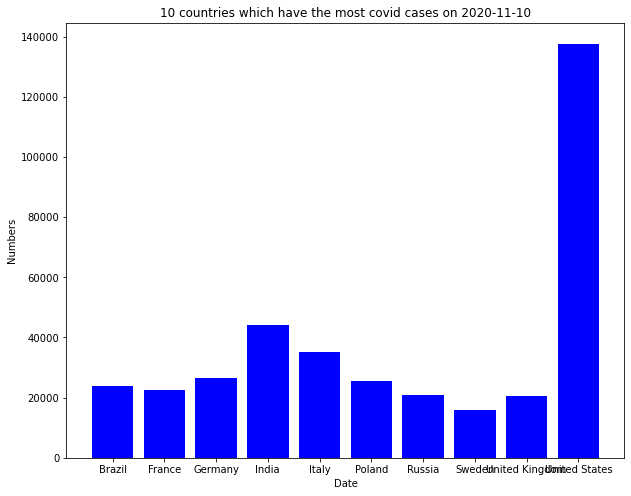

In [19]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# (3  pts)

# 4) On 2020-11-30, which ten countries has the most new cases? 

#    Use bar chart to show the top 10 location which have the most new covid cases 
res = df[df.date=='2020-11-10']


#Sorting cases
cases = res.sort_values(by='new_cases', ascending = False)


res = cases.head(10)[['location','new_cases']]
res = res.sort_index()


#Display dataframes
print("On 2020-11-10")
print("10 countries which have the most covid cases on 2020-11-10")
print("Country               Covid cases")
print('----------------------------------------------------')


for i in res.index:
    country = res['location'][i]
    new_cases = res['new_cases'][i]
    print('{0: <20}'.format(country), '\t', format(new_cases, '.0f'))
    
    
      
# Draw bar chart
plt.title("10 countries which have the most covid cases on 2020-11-10")
plt.xlabel("Date")
plt.ylabel("Numbers")

plt.bar(res['location'],res['new_cases'], color='b')




Arshad Uddin Mohammed, 20495 5688
------------------------------

In the past seven days the new cases in Saudi arabia
Date             Covid cases
------------------------------------------------


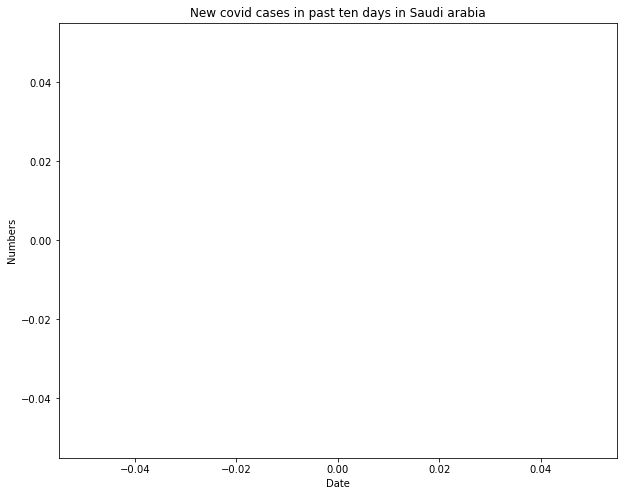

In [20]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# (3  pts)


#  5)  Show last seven days, the new cases in Saudi arabia (Chose one country),
#      Plot a line chart

cases = df[df.location=='Saudi arabia'].sort_values(by='date', ascending=True)
cases
res = cases[['date','new_cases']].tail(7)

print('\nIn the past seven days the new cases in Saudi arabia')
print('Date             Covid cases')
print('------------------------------------------------')

dates = res['date']
for i in res.index:
    print(res['date'][i], '\t', format(res['new_cases'][i], '.0f'))

plt.title('New covid cases in past ten days in Saudi arabia')
plt.xlabel('Date')
plt.ylabel('Numbers')

plt.plot(res['date'],res['new_cases'],color='b')








Arshad Uddin Mohammed, 20495 298
------------------------------
Total covid new cases by continent
----------------------------------
Europe               	 18555493
Asia                 	 17541537
North America        	 17156406
South America        	 11525035
Africa               	 2263193
Oceania              	 30788


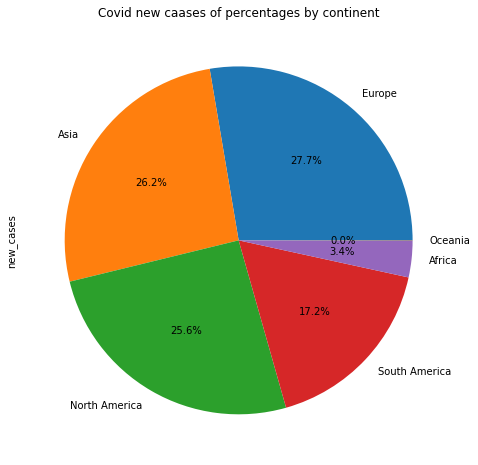

In [21]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')



# 6-7) Group by contient, show total of new covid cases for each contient and sorted by total number
#    Plot the result by pie chart (3 pts)
df
res = df.groupby(df.continent).new_cases.sum().sort_values(ascending=False)

print('Total covid new cases by continent')
print('----------------------------------')
names = res.index
for name in names:
    print('{0: <20}'.format(name), '\t', format(res[name], '.0f'))

res.plot(kind='pie', title='Covid new caases of percentages by continent', autopct='%1.1f%%')











In [22]:

res

continent
Europe     18555493.0
Asia       17541537.0
              ...    
Africa      2263193.0
Oceania       30788.0
Name: new_cases, Length: 6, dtype: float64

In [23]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# 8) Show the top 10 countries which have the most population  (3 pts)
df

res = df[df.date=='2020-11-10'][['location', 'population']].sort_values(by = 'population', ascending = False)
res = res.head(10)
res.index

print('Top 10 countries which have the most POPULATION')
for i in res.index:
    print('{0: <20}'.format(res['location'][i]), format(res['population'][i], '.0f'))

res2 = res.set_index('location')















Arshad Uddin Mohammed, 20495 2744
------------------------------
Top 10 countries which have the most POPULATION
China                1439323774
India                1380004385
United States        331002647
Indonesia            273523621
Pakistan             220892331
Brazil               212559409
Nigeria              206139587
Bangladesh           164689383
Russia               145934460
Mexico               128932753


Arshad Uddin Mohammed, 20495 2988
------------------------------
The world population 7746825445.0
Population by continent
------------------------------
Asia                 	 1471058800420
Africa               	 427276230799
Europe               	 238666388543
North America        	 190632186093
South America        	 137315976633
Oceania              	 13148799433


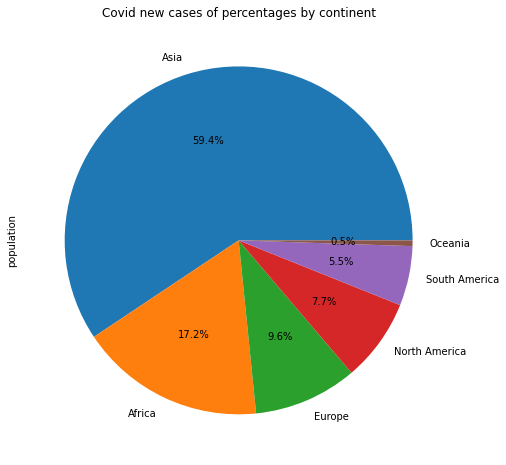

In [24]:
number = random.randint(0,10000)
print("Arshad Uddin Mohammed, 20495", number )
print('------------------------------')

# 9-10) Show the world poplation
#      Show the  population by each continent and show it as pie chart (6 pts)
data = df[df.date=='2020-11-10']
pop_sum = data['population'].sum()
print('The world population', pop_sum)

data = df[df.date=='2020-11-10'][['continent', 'location', 'date', 'population']]

res = df.groupby([df.continent]).population.sum().sort_values(ascending = False)

print('Population by continent')
print('------------------------------')
names = res.index
for name in names:
    print('{0: <20}'.format(name), '\t', format(res[name], '.0f'))

res.plot(kind='pie', title='Covid new cases of percentages by continent', autopct='%1.1f%%')




